
# Deep Learning Image Classification Project 

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
#!pip install torch torchvision tqdm
!pip install numpy torch==1.7.0+cpu torchvision==0.8.1+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached https://download.pytorch.org/whl/cpu/torch-1.7.0%2Bcpu-cp37-cp37m-linux_x86_64.whl (159.3 MB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.8.1%2Bcpu-cp37-cp37m-linux_x86_64.whl (11.8 MB)
  Using cached dataclasses-0.6-py3-none-any.whl (14 kB)

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
from sagemaker import get_execution_role, Session, image_uris 
from sagemaker.pytorch import PyTorch
import boto3

In [5]:
#referencing example here: https://sagemaker-examples.readthedocs.io/en/latest/introduction_to_amazon_algorithms/imageclassification_caltech/Image-classification-fulltraining.html#Prequisites-and-Preprocessing
role = get_execution_role()
bucket = sagemaker.Session().default_bucket()
training_image = image_uris.retrieve(
    region=boto3.Session().region_name, framework="image-classification"
)

In [6]:
import smdebug

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [3]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data: upload locally
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2023-02-02 02:49:10--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.160
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  45.2MB/s    in 28s     

2023-02-02 02:49:42 (38.1 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.

In [12]:
#referencing aws documentation here: https://sagemaker.readthedocs.io/en/stable/api/utility/s3.html#sagemaker.s3.S3Uploader
from sagemaker.s3 import S3Uploader as S3U #example found here: https://www.crimsonmacaw.com/blog/accessing-s3-buckets-from-python/
#manually created dogImages, train, test, and validation folders in bucket
s3_path_to_training_data = S3U.upload("/root/deep-learning-classification-project/CD0387-deep-learning-topics-within-computer-vision-nlp-project-starter/dogImages/train", "s3://" + bucket + "/dogImages/train")
print(s3_path_to_training_data)

s3://sagemaker-us-east-1-425636437011/dogImages/train


In [13]:
s3_path_to_test_data = S3U.upload("/root/deep-learning-classification-project/CD0387-deep-learning-topics-within-computer-vision-nlp-project-starter/dogImages/test", "s3://" + bucket + "/dogImages/test")
print(s3_path_to_test_data)

s3://sagemaker-us-east-1-425636437011/dogImages/test


In [14]:
s3_path_to_validation_data = S3U.upload("/root/deep-learning-classification-project/CD0387-deep-learning-topics-within-computer-vision-nlp-project-starter/dogImages/valid", "s3://" + bucket + "/dogImages/valid")
print(s3_path_to_validation_data)

s3://sagemaker-us-east-1-425636437011/dogImages/valid


In [ ]:
#Let's look at our dataset, dogImages zip file from Udacity course includes 133 dog breed folders with several images of each
#separated into folers for training, testing, and validation
#images vary in background and general features of dogs vary per breed

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [7]:
from sagemaker.tuner import(
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

In [8]:
#TODO: Declare your HP ranges, metrics etc.
#referenced example: https://github.com/aws/amazon-sagemaker-examples/blob/main/hyperparameter_tuning/pytorch_mnist/hpo_pytorch_mnist.ipynb
#referenced examples from 'Deploy Deep Learning Models on Sagemaker' lesson in 'Hyperparameter Tuning in Sagemaker' page
hyperparameter_ranges= {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch_size": CategoricalParameter([32, 64, 128, 256, 512]),
}

In [9]:
#referencing: https://docs.aws.amazon.com/sagemaker/latest/dg/debugger-configure-hook.html
from sagemaker.debugger import CollectionConfig

#collection_configs=[
#    CollectionConfig(name="loss"),
#    CollectionConfig(name="accuracy")
#]
#referencing example here: https://repost.aws/questions/QUUl_ylpIuQUWy0N-CDqP_ag/sage-maker-debugger-cannot-load-training-information-of-estimator
#referencing example in 'tech-help' slack channel
#collection_configs=[CollectionConfig(name="CrossEntropyLoss_output_0", parameters={"include_regex": "CrossEntropyLoss_output_0", "train.save_interval": "1", "eval.save_interval": "1"}),
#                   CollectionConfig(name="CrossEntropyLoss_output_1", parameters={"include_regex": "CrossEntropyLoss_output_1", "train.save_interval": "1", "eval.save_interval": "1"})
#                   ]

collection_configs=[CollectionConfig(name="all", parameters={"train.save_interval": "100", "eval.save_interval": "10"})]

In [10]:
#from example here: https://sagemaker.readthedocs.io/en/stable/api/training/debugger.html#sagemaker.debugger.DebuggerHookConfig
from sagemaker.debugger import ProfilerConfig, FrameworkProfile

profiler_config=ProfilerConfig(
    framework_profile_params=FrameworkProfile()
)

In [11]:
#referencing response to session lead office hours response to question about error on not being able to find debughookconfig file
#import boto3
#referencing sagemaker documentation here: https://sagemaker.readthedocs.io/en/stable/amazon_sagemaker_debugger.html#capture-real-time-debugging-data-during-model-training-in-amazon-sagemaker
from sagemaker.debugger import (
    Rule,
    DebuggerHookConfig,
    rule_configs,
    ProfilerRule,
)

rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]

hook_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "100", "eval.save_interval": "10"},
    collection_configs=collection_configs
)

In [19]:
#TODO: Create estimators for your HPs

estimator = PyTorch(
    entry_point="hpo.py",
    role=get_execution_role(),
    py_version="py3",
    framework_version="1.4.0",
    instance_count=1,
    instance_type="ml.m5.xlarge",
    #Debugger parameters
    rules=rules,
    debugger_hook_config=hook_config, #where do I tell it where my configuration file is?
    profiler_config=profiler_config,
    #hyerparameters={"epochs": 3},   
)# TODO: Your estimator here

objective_metric_name= "accuracy"
metric_definitions = [{"Name": "accuracy", "Regex": "'accuracy': ([0-9\\.]+)"}]
#objective_type="Minimize"

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=2,
    max_parallel_jobs=2,
    objective_type="Maximize",
)# TODO: Your HP tuner here

In [13]:
import os

In [20]:
# TODO: Fit your HP Tuner
#example reference here: https://sagemaker-examples.readthedocs.io/en/latest/hyperparameter_tuning/pytorch_mnist/hpo_pytorch_mnist.html
#inputs = sagemaker_session.upload_data(path="dogImages/train", bucket="s3://sagemaker-us-east-1-425636437011", key_prefix="")
#tuner.fit({"train": "s3://sagemaker-us-east-1-425636437011/dogImages/train", "test": "s3://sagemaker-us-east-1-425636437011/dogImages/test"}) 

# TODO: Remember to include your data channels

#referencing train and deploy sagemaker example from operationalizing machine learning model
os.environ['SM_CHANNEL_TRAINING']='s3://sagemaker-us-east-1-425636437011/dogImages/train'
os.environ['SM_CHANNEL_TEST']='s3://sagemaker-us-east-1-425636437011/dogImages/test'
#os.environ['SM_MODEL_DIR']='s3://sagemaker-us-east-1-425636437011/model'
#os.environ['SM_OUTPUT_DATA_DIR']='s3://sagemaker-us-east-1-425636437011/project-hpo-output/'

tuner.fit({"training":"s3://sagemaker-us-east-1-425636437011/dogImages/train", "test": "s3://sagemaker-us-east-1-425636437011/dogImages/test"})

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


............................................................................................................................................................................!


In [21]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator() #TODO

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2023-02-26 05:04:32 Starting - Preparing the instances for training
2023-02-26 05:04:32 Downloading - Downloading input data
2023-02-26 05:04:32 Training - Training image download completed. Training in progress.
2023-02-26 05:04:32 Uploading - Uploading generated training model
2023-02-26 05:04:32 Completed - Resource retained for reuse


{'_tuning_objective_metric': '"accuracy"',
 'batch_size': '"128"',
 'lr': '0.0013751784167658056',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2023-02-26-04-51-06-395"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-425636437011/pytorch-training-2023-02-26-04-51-06-395/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [7]:
#referencing 'model_debugging.ipynb' from model debugging sample files
from sagemaker.debugger import(
    Rule,
    DebuggerHookConfig,
    rule_configs,
)

In [8]:
from sagemaker.debugger import Rule, ProfilerRule, rule_configs
# TODO: Set up debugging and profiling rules and hooks
rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]

In [9]:
#from example here: https://sagemaker.readthedocs.io/en/stable/api/training/debugger.html#sagemaker.debugger.DebuggerHookConfig
from sagemaker.debugger import ProfilerConfig, FrameworkProfile

profiler_config=ProfilerConfig(
    framework_profile_params=FrameworkProfile()
)

In [20]:
#referencing: https://docs.aws.amazon.com/sagemaker/latest/dg/debugger-configure-hook.html
from sagemaker.debugger import CollectionConfig

#collection_configs=[
#    CollectionConfig(name="loss"),
#    CollectionConfig(name="accuracy")
#]
#referencing example here: https://repost.aws/questions/QUUl_ylpIuQUWy0N-CDqP_ag/sage-maker-debugger-cannot-load-training-information-of-estimator
#referencing example in 'tech-help' slack channel
#collection_configs=[CollectionConfig(name="CrossEntropyLoss_output_0", parameters={"include_regex": "CrossEntropyLoss_output_0", "train.save_interval": "1", "eval.save_interval": "1"}),
#                   CollectionConfig(name="CrossEntropyLoss_output_1", parameters={"include_regex": "CrossEntropyLoss_output_1", "train.save_interval": "1", "eval.save_interval": "1"})
#                   ]

#collection_configs=[CollectionConfig(name="all", parameters={"include_regex": ".*", "train.save_interval": "5", "eval.save_interval": "1"})]

#referencing example here: https://sagemaker-examples.readthedocs.io/en/latest/sagemaker-debugger/mnist_tensor_plot/mnist-tensor-plot.html
collection_configs=[
    CollectionConfig(name="all", parameters={"include_regex": ".*", "train.save_interval": "10", "eval.save_interval": "10"})
]

In [21]:
#hook_parameters={"train.save_interval": "10", "eval.save_internal": "10"}
hook_config = DebuggerHookConfig(
    s3_output_path= "s3://sagemaker-us-east-1-425636437011/project3-debugger/",
    hook_parameters={"train.save_interval": "10", "eval.save_internal": "10", "tensor_regex": ".*"},
    collection_configs=collection_configs,
)

In [12]:
#using the best hyperparameters from previous step, hyperparameter tuning here:
hyperparameters = {"epochs": "3", "batch_size": 128, "test_batch_size":100, "lr": 0.001}

In [24]:
# TODO: Create and fit an estimator
# Referencing 'Amazon Sagemaker Debugger' documentation: https://sagemaker.readthedocs.io/en/stable/amazon_sagemaker_debugger.html
estimator = PyTorch(
    entry_point="train_model.py",
    base_job_name= None,
    role=get_execution_role(),
    instance_count=1,
    instance_type="ml.m5.xlarge",
    volume_size=400,
    max_run = 3600,
    hyperparameters=hyperparameters,
    framework_version="1.8.0",
    py_version="py36",
    #Debugger parameters
    rules = rules,
    debugger_hook_config=hook_config,
    profiler_config=profiler_config,
    #source_dir = "./"
)# TODO: Your estimator here

In [14]:
import os
os.environ['SM_CHANNEL_TRAIN']='s3://sagemaker-us-east-1-425636437011/dogImages/train'
os.environ['SM_CHANNEL_TEST']='s3://sagemaker-us-east-1-425636437011/dogImages/test'
#os.environ['SM_MODEL_DIR']='s3://sagemaker-us-east-1-425636437011/model'
#os.environ['SM_OUTPUT_DATA_DIR']='s3://sagemaker-us-east-1-425636437011/project3-debugger/'

In [25]:
#referencing tutorial: https://www.pluralsight.com/guides/introduction-to-resnet, https://docs.aws.amazon.com/sagemaker/latest/dg/debugger-modify-script-pytorch.html, https://blog.paperspace.com/pytorch-hooks-gradient-clipping-debugging/
#https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/
estimator.fit({'train':'s3://sagemaker-us-east-1-425636437011/dogImages/train', 'test': 's3://sagemaker-us-east-1-425636437011/dogImages/test'})

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: pytorch-training-2023-02-28-04-02-32-591


2023-02-28 04:02:33 Starting - Starting the training job...
2023-02-28 04:02:57 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
......
2023-02-28 04:03:58 Downloading - Downloading input data......
2023-02-28 04:04:58 Training - Downloading the training image.....bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-02-28 04:05:40,202 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-02-28 04:05:40,205 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-02-28 04:05:40,214 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-02-28 04:05:40,217 sagemaker_pytorch_container.training INFO     Invoking user training script.
2023-02-28 04:05:40,384 sagemaker-training-toolkit

In [ ]:
#completed training job: pytorch-training-2023-02-28-04-02-32-591

In [26]:
job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)

# Plotting Results
### TODO: Plot a debugging output.
### Referencing 'Amazon Sagemaker Debugger' documentation: https://sagemaker.readthedocs.io/en/stable/amazon_sagemaker_debugger.html

In [27]:
#found flaw in latest_job_debugger_artifacts_path(); does not match hook configuration by default; assumes default used and outputs even does not exist
debug_output_path = estimator.latest_job_debugger_artifacts_path()
print(debug_output_path)

s3://sagemaker-us-east-1-425636437011/project3-debugger/pytorch-training-2023-02-28-04-02-32-591/debug-output


In [28]:
from smdebug.trials import create_trial
#trial = create_trial(path='s3://sagemaker-us-east-1-425636437011/project3-debugger/', name='pytorch-training-2023-02-25-21-03-44-898')
trial = create_trial(debug_output_path)

[2023-02-28 04:29:12.904 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:17 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-02-28 04:29:12.921 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:17 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-425636437011/project3-debugger/pytorch-training-2023-02-28-04-02-32-591/debug-output


In [29]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals= []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

In [35]:
#referencing example notebook in 'Excercise: Debugger and Profiling'
#and here: https://github.com/aws/amazon-sagemaker-examples/blob/main/sagemaker-debugger/pytorch_model_debugging/pytorch_script_change_smdebug.ipynb
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot

def plot_tensor(trial, tensor_name):
    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    
    fig = plt.figure(figsize=(5, 5))
    host = host_subplot(111)
    
    par = host.twiny()
    
    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)
    
    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    leg = plt.legend()
    
    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())
    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())
    
    plt.ylabel(tensor_name)
    
    plt.show()

In [31]:
print(trial.tensor_names())

[2023-02-28 04:29:51.639 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:17 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2023-02-28 04:29:52.659 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:17 INFO trial.py:210] Loaded all steps
['CrossEntropyLoss_input_0', 'CrossEntropyLoss_input_1', 'CrossEntropyLoss_input_2', 'CrossEntropyLoss_input_3', 'CrossEntropyLoss_input_4', 'CrossEntropyLoss_input_5', 'CrossEntropyLoss_output_0', 'CrossEntropyLoss_output_1', 'CrossEntropyLoss_output_2', 'ResNet_bn1.bias', 'ResNet_bn1.weight', 'ResNet_conv1.weight', 'ResNet_fc.0.bias', 'ResNet_fc.0.weight', 'ResNet_input_0', 'ResNet_layer1.0.bn1.bias', 'ResNet_layer1.0.bn1.weight', 'ResNet_layer1.0.bn2.bias', 'ResNet_layer1.0.bn2.weight', 'ResNet_layer1.0.conv1.weight', 'ResNet_layer1.0.conv2.weight', 'ResNet_layer1.1.bn1.bias', 'ResNet_layer1.1.bn1.weight', 'ResNet_layer1.1.bn2.bias', 'ResNet_layer1.1.bn2.weight', 'ResNet_layer1.1.conv1.weight', 'ResNet_

In [32]:
from smdebug.core.modes import ModeKeys
print(len(trial.tensor("scalar/accuracy").steps(mode=ModeKeys.EVAL)))

3


In [33]:
print(len(trial.tensor("scalar/accuracy").steps(mode=ModeKeys.TRAIN)))

11


In [45]:
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN)))

11


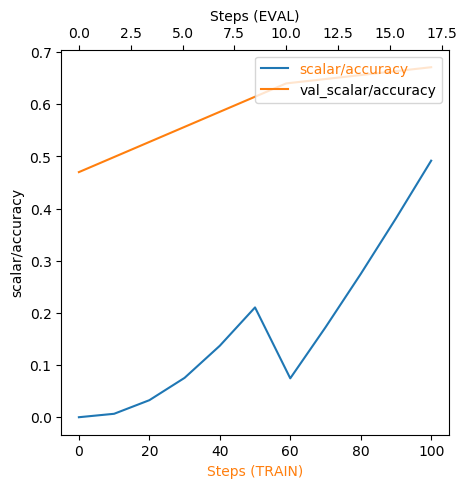

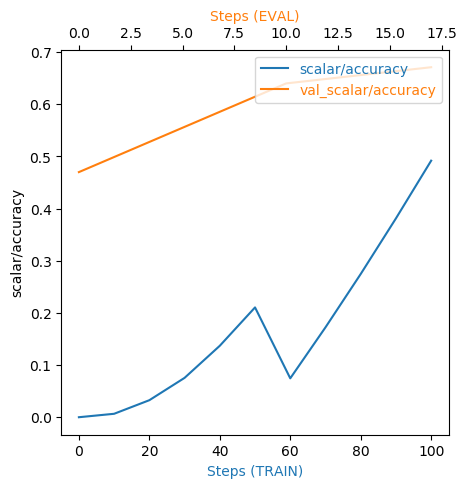

In [36]:
#example plot from smdebugger module and examples, not current training job, test for code
plot_tensor(trial, "scalar/accuracy")

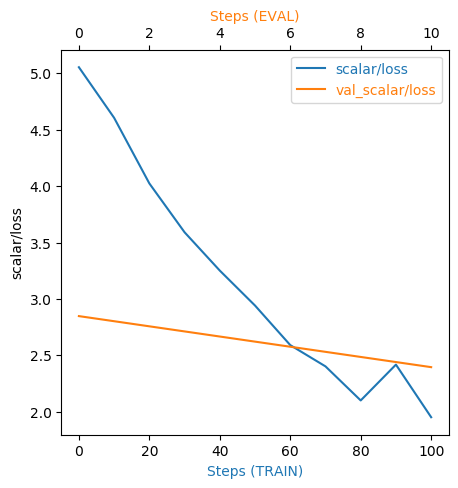

In [54]:
plot_tensor(trial, "scalar/loss")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [37]:
# TODO: Display the profiler output
#hard coded: rule_output_path = "s3://sagemaker-us-east-1-425636437011" + "/pytorch-training-2023-02-19-18-32-24-037" + "/rule-output"
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"

In [38]:
! aws s3 ls {rule_output_path} --recursive

2023-02-28 04:28:10     375983 pytorch-training-2023-02-28-04-02-32-591/rule-output/ProfilerReport/profiler-output/profiler-report.html
2023-02-28 04:28:10     223918 pytorch-training-2023-02-28-04-02-32-591/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2023-02-28 04:28:05        192 pytorch-training-2023-02-28-04-02-32-591/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2023-02-28 04:28:05        200 pytorch-training-2023-02-28-04-02-32-591/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2023-02-28 04:28:05       1931 pytorch-training-2023-02-28-04-02-32-591/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2023-02-28 04:28:05        127 pytorch-training-2023-02-28-04-02-32-591/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2023-02-28 04:28:05        199 pytorch-training-2023-02-28-04-02-32-591/rule-output/ProfilerReport/profiler-output/profiler-re

In [39]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-425636437011/pytorch-training-2023-02-28-04-02-32-591/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-425636437011/pytorch-training-2023-02-28-04-02-32-591/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-425636437011/pytorch-training-2023-02-28-04-02-32-591/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1-425636437011/pytorch-training-2023-02-28-04-02-32-591/rule-output/ProfilerReport/profiler-output/profiler-report.html to ProfilerReport/profiler-output/profiler-report.html
download: s3://sagemaker-us-east-1-425636437011/pytorch-training-2023-02-28-04-02-32-591/rul

In [40]:
import os

profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [41]:
import IPython

IPython.display.HTML(filename=str(profiler_report_name) + "/profiler-output/profiler-report.html")

## Model Deploying

In [7]:
#in case have to stop kerneal and restart debugging here:
#from sagemaker.pytorch import PyTorch
#estimator = PyTorch.attach('pytorch-training-2023-02-26-06-40-43-535')


2023-02-26 07:04:23 Starting - Preparing the instances for training
2023-02-26 07:04:23 Downloading - Downloading input data
2023-02-26 07:04:23 Training - Training image download completed. Training in progress.
2023-02-26 07:04:23 Uploading - Uploading generated training model
2023-02-26 07:04:23 Completed - Training job completed


In [42]:
#TODO: Add Model Loader; from example provided during connect session 10 (02/24/23)
from sagemaker.pytorch import PyTorchModel

model = PyTorchModel(
    entry_point="inference.py",
    role=role,
    model_data= estimator.output_path + estimator.latest_training_job.job_name + "/output/model.tar.gz",
    framework_version="1.8",
    py_version="py36",
)

In [93]:
#from docs here: https://sagemaker-examples.readthedocs.io/en/latest/frameworks/pytorch/get_started_mnist_deploy.html
#from sagemaker.serializers import JSONSerializer
#from sagemaker.deserializers import JSONDeserializer

In [43]:
# TODO: Deploy your model to an endpoint
# referencing: https://sagemaker-examples.readthedocs.io/en/latest/frameworks/pytorch/get_started_mnist_deploy.html

predictor=estimator.deploy(
    initial_instance_count=1, 
    instance_type="ml.m5.large",
    #serializer=JSONSerializer(),
    #deserializer=JSONDeserializer(),
) # TODO: Add your deployment configuration like instance type and number of instances
print(predictor)

INFO:sagemaker:Creating model with name: pytorch-training-2023-02-28-04-32-45-070
INFO:sagemaker:Creating endpoint-config with name pytorch-training-2023-02-28-04-32-45-070
INFO:sagemaker:Creating endpoint with name pytorch-training-2023-02-28-04-32-45-070


------!<sagemaker.pytorch.model.PyTorchPredictor object at 0x7fe5b49e3d10>


In [46]:
import torch

In [47]:
import torchvision

In [48]:
#------------!<sagemaker.pytorch.model.PyTorchPredictor object at 0x7fdab303e390>
#endpoint name: pytorch-training-2023-02-20-04-14-15-959
#how-to process image to expected input
from PIL import Image
#import torchvision
import torchvision.transforms as transforms

#referencing example here: https://stackoverflow.com/questions/60841650/how-to-test-one-single-image-in-pytorch
#and here: https://discuss.pytorch.org/t/how-to-classify-single-image-using-loaded-net/1411
def load_image(path):
    x = Image.open(path).convert('RGB')
    
    transform_for_model = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ])
    
    transform_image=transform_for_model(x).float()
    test_image=transform_image.unsqueeze(0)
    
    #referencing example from https://pynative.com/python-serialize-numpy-ndarray-into-json/
    #test_image = test_image.numpy().tobytes()
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    test_image=test_image.to(device)
    
    return test_image

In [49]:
#Loading sample image
test_image_path = "./dogImages/test/054.Collie/Collie_03790.jpg"

In [52]:
# TODO: Run an prediction on the endpoint
# referencing 'developing-ml-workflow-project2' completed project from personal github: https://github.com/ashleyiperez/developing-ml-workflow-project2/blob/main/starter.ipynb
#referencing 'hpo_deploy.ipynb' from 'model deployment example files' in lesson 3

image = load_image(test_image_path) # TODO: Your code to load and preprocess image to send to endpoint for prediction
response = predictor.predict(image)
print(response)

[[-6.83844995 -1.75055027 -4.29767323 -1.74731898 -0.58022064 -4.32038021
  -2.95643735 -4.89326954 -3.21642208 -2.03524566 -2.89499354 -0.59245384
  -5.08159828 -3.22451901 -3.46548223 -3.81230068 -4.89622164 -4.55847883
  -4.10726929 -3.1176312  -2.32869625 -1.32760227 -3.03402138 -7.65360022
  -4.39550161 -6.41110516 -4.19448805 -4.16347599 -1.59259951 -4.7761178
  -0.2159348  -6.69350195 -4.98299503 -6.30247259 -4.59933376 -2.03383827
  -2.82112312 -6.13894796 -5.07447386 -5.83631229 -5.16294527 -5.1097064
  -2.55636668 -6.9405036  -1.04006839 -6.08720303 -3.85909581 -6.84145212
  -5.23546934 -5.41902828 -2.66168737 -1.80390012 -4.5828886  -0.58835202
  -4.09215641 -4.7925992  -4.69953394 -4.69501448 -5.81222773 -6.08473825
  -2.4170084  -2.08187675 -3.64036298 -4.80186176 -4.95227194 -4.00941563
  -3.88012123 -3.75136137 -7.15373278 -5.77673769 -1.6828413  -5.01322174
  -4.18609428 -4.66905022 -2.92503595 -0.50062871 -4.65322351 -3.5626502
  -1.77656567 -4.28302193 -3.33902168 -5.

In [53]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pytorch-training-2023-02-28-04-32-45-070
INFO:sagemaker:Deleting endpoint with name: pytorch-training-2023-02-28-04-32-45-070


In [ ]:
# Comment on prediction: matrix represents probability of class output, in this case, Collie should have lowest or one of lowest numbers